In [1]:
import pandas as pd
import numpy as np
from numpy import mean, std
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import cross_val_score, train_test_split, RepeatedKFold, KFold, RepeatedStratifiedKFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, FunctionTransformer, PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import make_regression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, confusion_matrix, plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# DATA EXPLORATION

In [2]:
house_df = pd.read_csv('DS3_C6_S2_Classification_HouseGrade_Data_Project.csv')
house_df

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,341,9,6,5,7,YES,95,115,5,90,2,4246,B
2996,2997,292,9,8,7,8,YES,116,87,7,97,4,3753,A
2997,2998,328,7,4,3,5,NO,0,78,5,95,6,3607,D
2998,2999,293,9,7,7,8,NO,0,78,7,51,3,4198,B


In [3]:
print(f"Shape of the dataframe : {house_df.shape}\n")
print(f"Summary of the dataframe : \n\n{house_df.describe()}\n")
print(f"\nInformation about the dataframe : \n{house_df.info()}\n")
print(f"\nNull values is the dataframe : \n\n{house_df.isnull().sum()}\n")

Shape of the dataframe : (3000, 14)

Summary of the dataframe : 

                Id  Area(total)       Trooms    Nbedrooms  Nbwashrooms  \
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000   
mean   1500.500000   325.117000     7.021667     5.023000     4.513667   
std     866.169729    20.507742     1.421221     1.634838     1.715263   
min       1.000000   290.000000     5.000000     2.000000     1.000000   
25%     750.750000   308.000000     6.000000     4.000000     3.000000   
50%    1500.500000   325.000000     7.000000     5.000000     4.000000   
75%    2250.250000   343.000000     8.000000     6.000000     6.000000   
max    3000.000000   360.000000     9.000000     8.000000     8.000000   

        Twashrooms   Roof(Area)   Lawn(Area)      Nfloors          API  \
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000   
mean      6.010667    48.980667    95.609333     4.013333    70.190667   
std       1.786136    48.746641    14.837388 

In [4]:
for i in house_df:
    if house_df[i].dtype == 'int64' or house_df[i].dtype == 'float64':
        if house_df[i].isnull().sum() > 0:
            house_df[i].fillna(house_df[i].mean(), inplace = True)
print(house_df[i].isnull().sum())

0


In [5]:
cat_col = list(house_df.select_dtypes(include='object'))
cat_col

['roof', 'Grade']

# EXPLORATORY DATA ANALYSIS

In [6]:
def bar_percentage(ax,count='number of rows in data'):
    for bar in ax.patches:                                           
        percentage = f"{round((bar.get_height() /count)*100, 2)}%"
        x = bar.get_x() + bar.get_width() /2
        y = bar.get_height()
        ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7')])

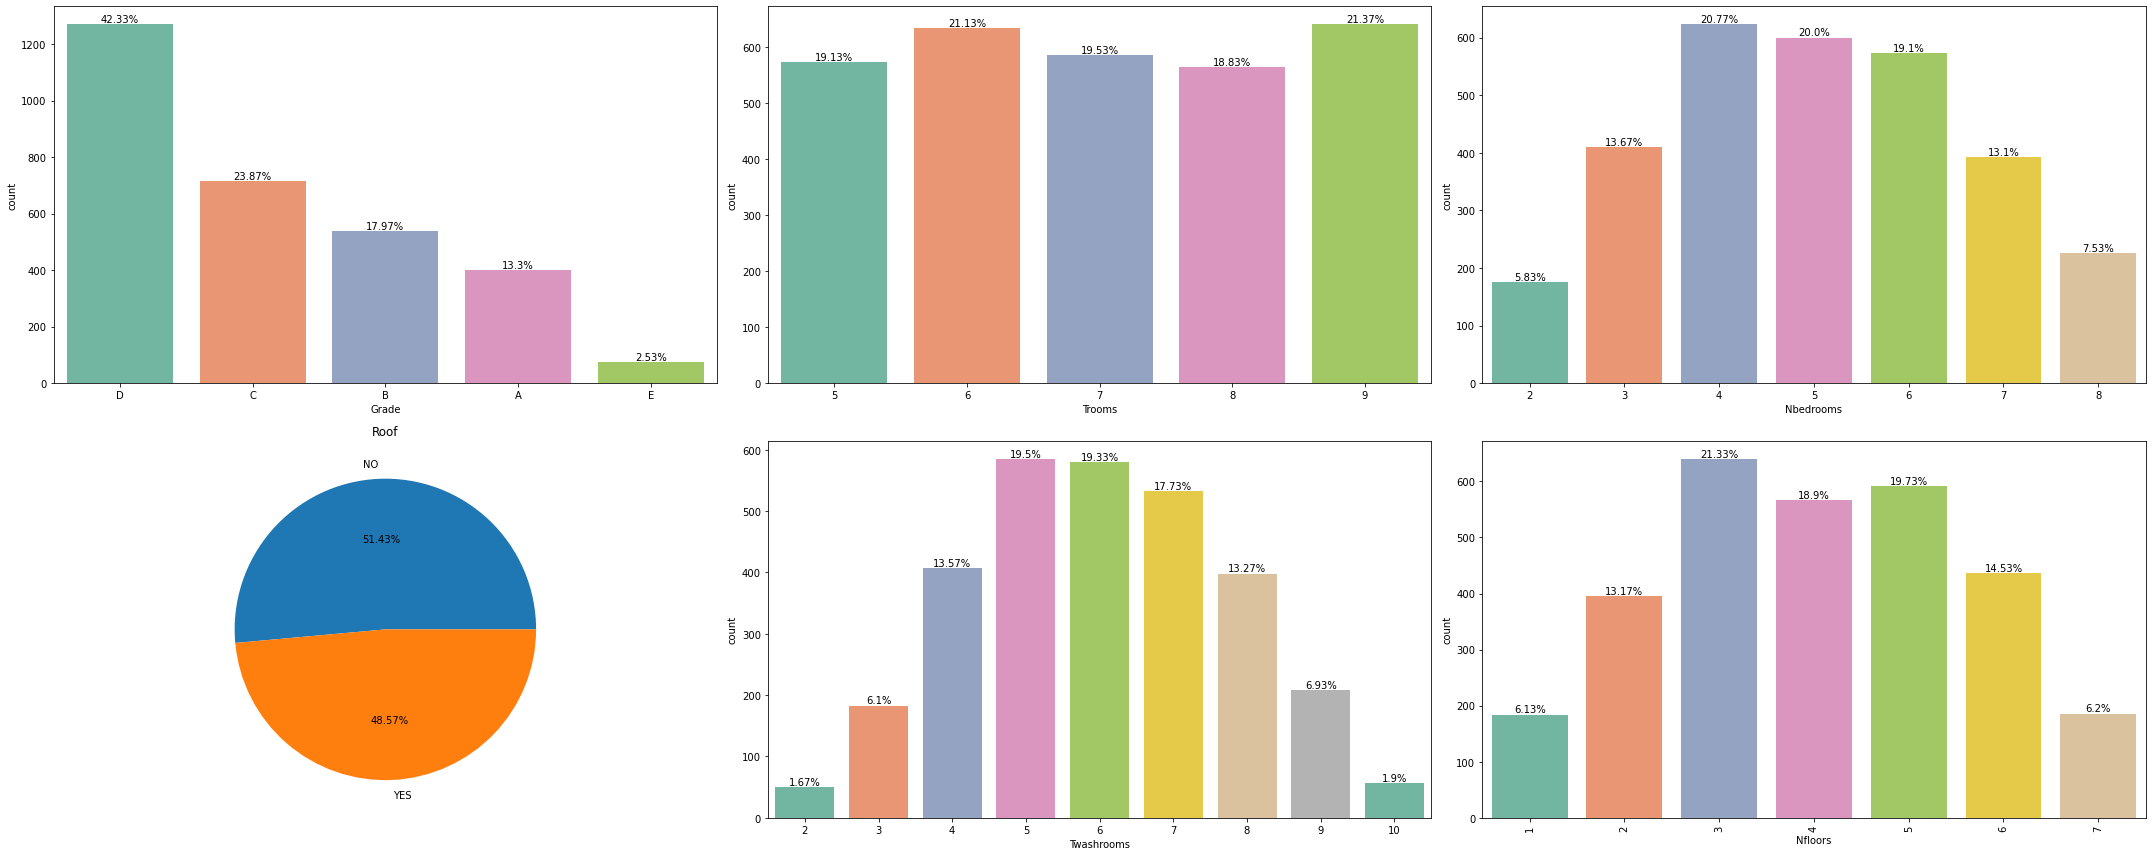

In [7]:
# Plotting the countplot for univariate analysis

fig, ax = plt.subplots(2,3, tight_layout=True ,figsize=(30,12))
bar_percentage(sb.countplot(house_df['Grade'], palette='Set2', ax=ax[0][0]), len(house_df))
bar_percentage(sb.countplot(house_df['Trooms'], palette='Set2', ax=ax[0][1]), len(house_df))
bar_percentage(sb.countplot(house_df['Nbedrooms'], palette="Set2", ax=ax[0][2]), len(house_df))
data = house_df['roof'].value_counts()
ax[1][0].pie(data,autopct='%.2f%%',labels=house_df['roof'].unique())
ax[1][0].set_title('Roof')
bar_percentage(sb.countplot(house_df['Twashrooms'], palette="Set2", ax=ax[1][1]), len(house_df))
bar_percentage(sb.countplot(house_df['Nfloors'], palette="Set2", ax=ax[1][2]), len(house_df))
plt.xticks(rotation=90)

1. D grade houses are mostly available

2. Houses with 9 rooms are available mostly

3. Maximum of 4 bedrooms are avaialble in most of the houses

4. Almost houses with roof and roofless are equally available

5. Almost many houses have total of 5 washrooms

6. Mostly houses with 3 floors are highly available

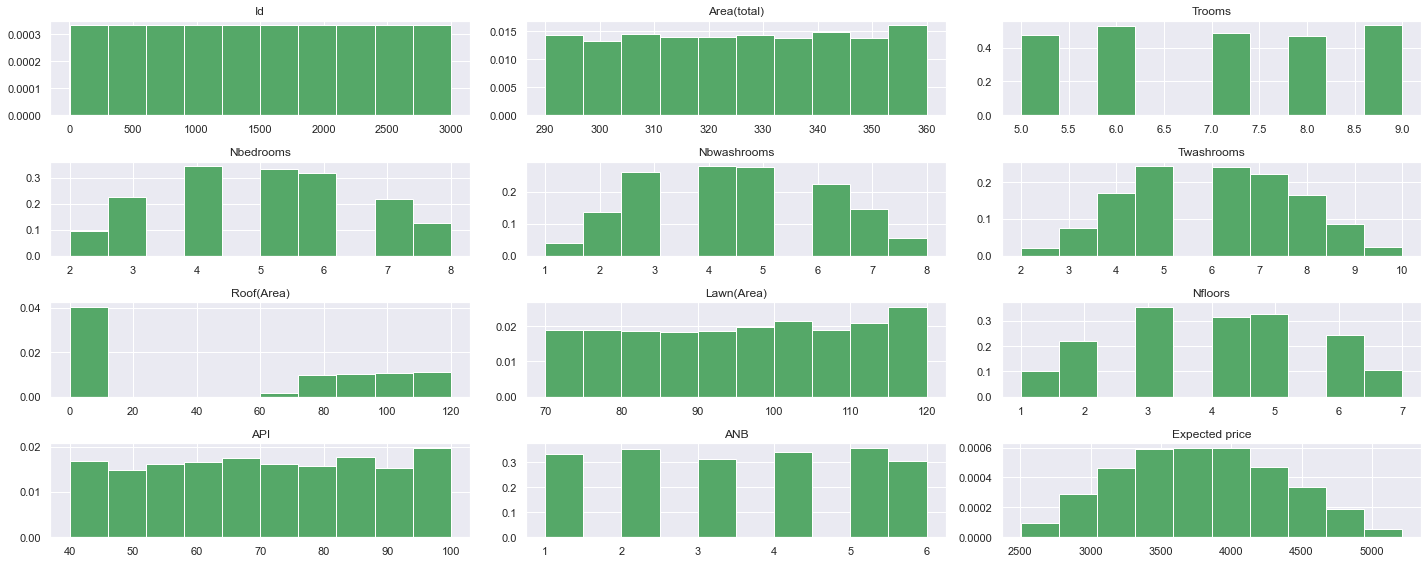

In [8]:
# For numerical Colums
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_df = house_df.select_dtypes(include=numerics)
numeric_cols=new_df.columns
num_cols=3
n_bins = 10
sb.set(style="darkgrid")

# Num of Rows
num_rows= int(len(numeric_cols)/num_cols)
fig, axs = plt.subplots(num_rows, num_cols, tight_layout=True,figsize=(20,8))

# For visualizing the data usig histogram
for col, ax in zip(numeric_cols,axs.flatten()[:len(numeric_cols)]):
    ax.hist(new_df[col],bins=n_bins,density=True,color = "g")
    ax.set_title(col)

plt.show()

More over area of the house an API are uniformly distributed and expected price is normally distributed.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'D'),
  Text(1, 0, 'C'),
  Text(2, 0, 'B'),
  Text(3, 0, 'A'),
  Text(4, 0, 'E')])

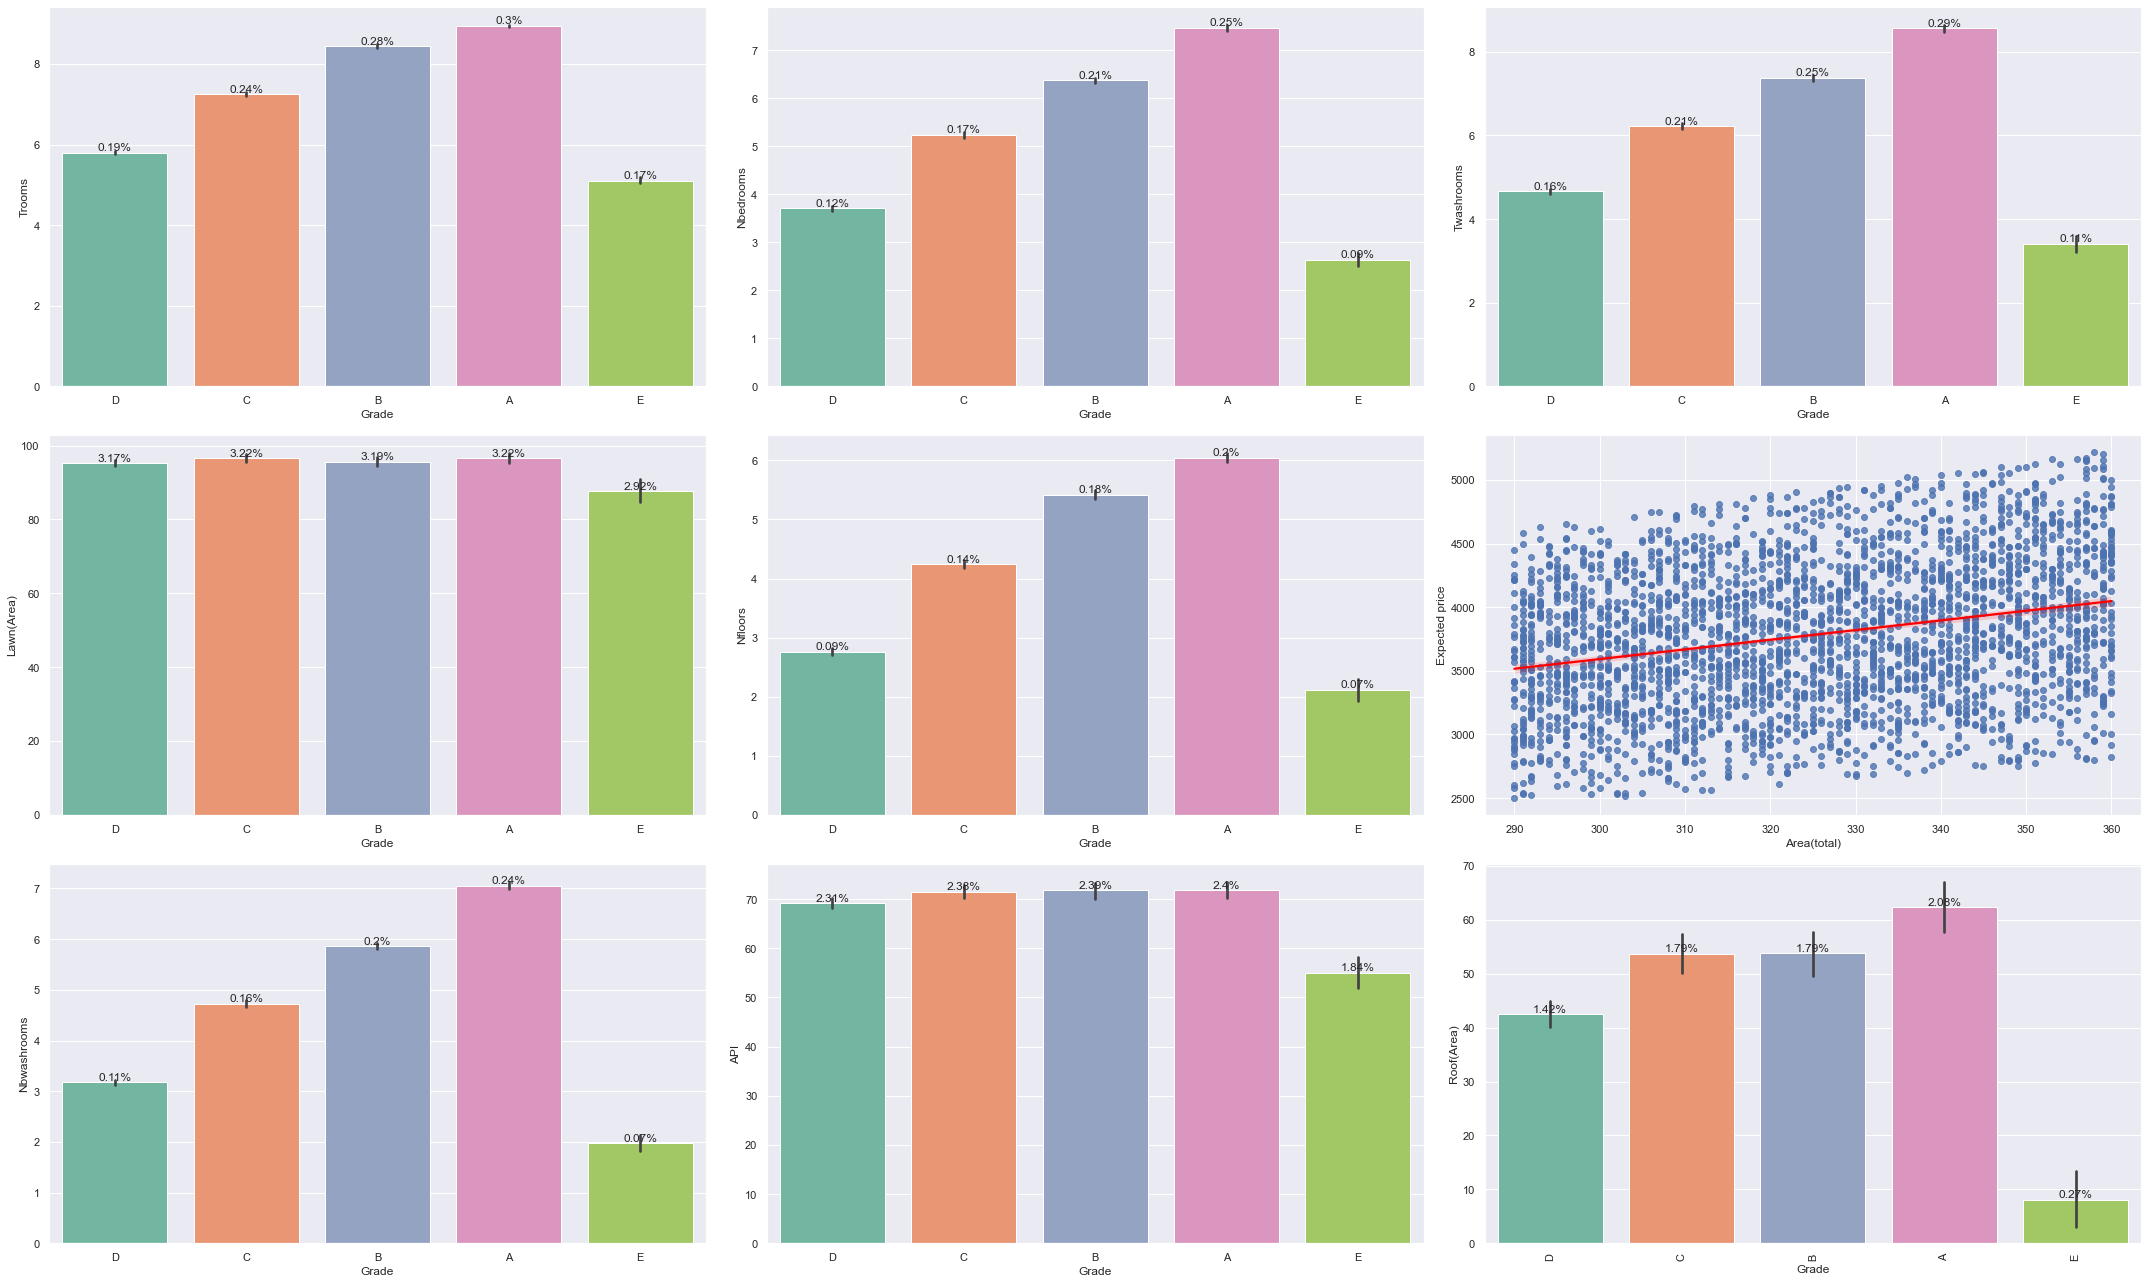

In [9]:
# Plotting the barplot for bivariate analysis

fig, ax = plt.subplots(3,3, tight_layout=True ,figsize=(30,18))
bar_percentage(sb.barplot(x=house_df['Grade'], y = house_df['Trooms'],palette='Set2', ax=ax[0][0]), len(house_df))
bar_percentage(sb.barplot(x=house_df['Grade'], y=house_df['Nbedrooms'],palette='Set2', ax=ax[0][1]), len(house_df))
bar_percentage(sb.barplot(house_df['Grade'],y=house_df['Twashrooms'], palette="Set2", ax=ax[0][2]), len(house_df))
bar_percentage(sb.barplot(house_df['Grade'],y=house_df['Lawn(Area)'], palette="Set2", ax=ax[1][0]), len(house_df))
bar_percentage(sb.barplot(house_df['Grade'],y=house_df['Nfloors'], palette="Set2", ax=ax[1][1]), len(house_df))
sb.regplot(x=house_df['Area(total)'],y=house_df['Expected price'],line_kws={'color':'red'},ax=ax[1][2])
bar_percentage(sb.barplot(house_df['Grade'],y=house_df['Nbwashrooms'], palette="Set2", ax=ax[2][0]), len(house_df))
bar_percentage(sb.barplot(house_df['Grade'],y=house_df['API'], palette="Set2", ax=ax[2][1]), len(house_df))
bar_percentage(sb.barplot(house_df['Grade'],y=house_df['Roof(Area)'], palette="Set2", ax=ax[2][2]), len(house_df))
plt.xticks(rotation=90)

7. A grade houses tops the chart in all category in which no of rooms, washrooms, floors, roof area and lawn area and which is also higher is budget

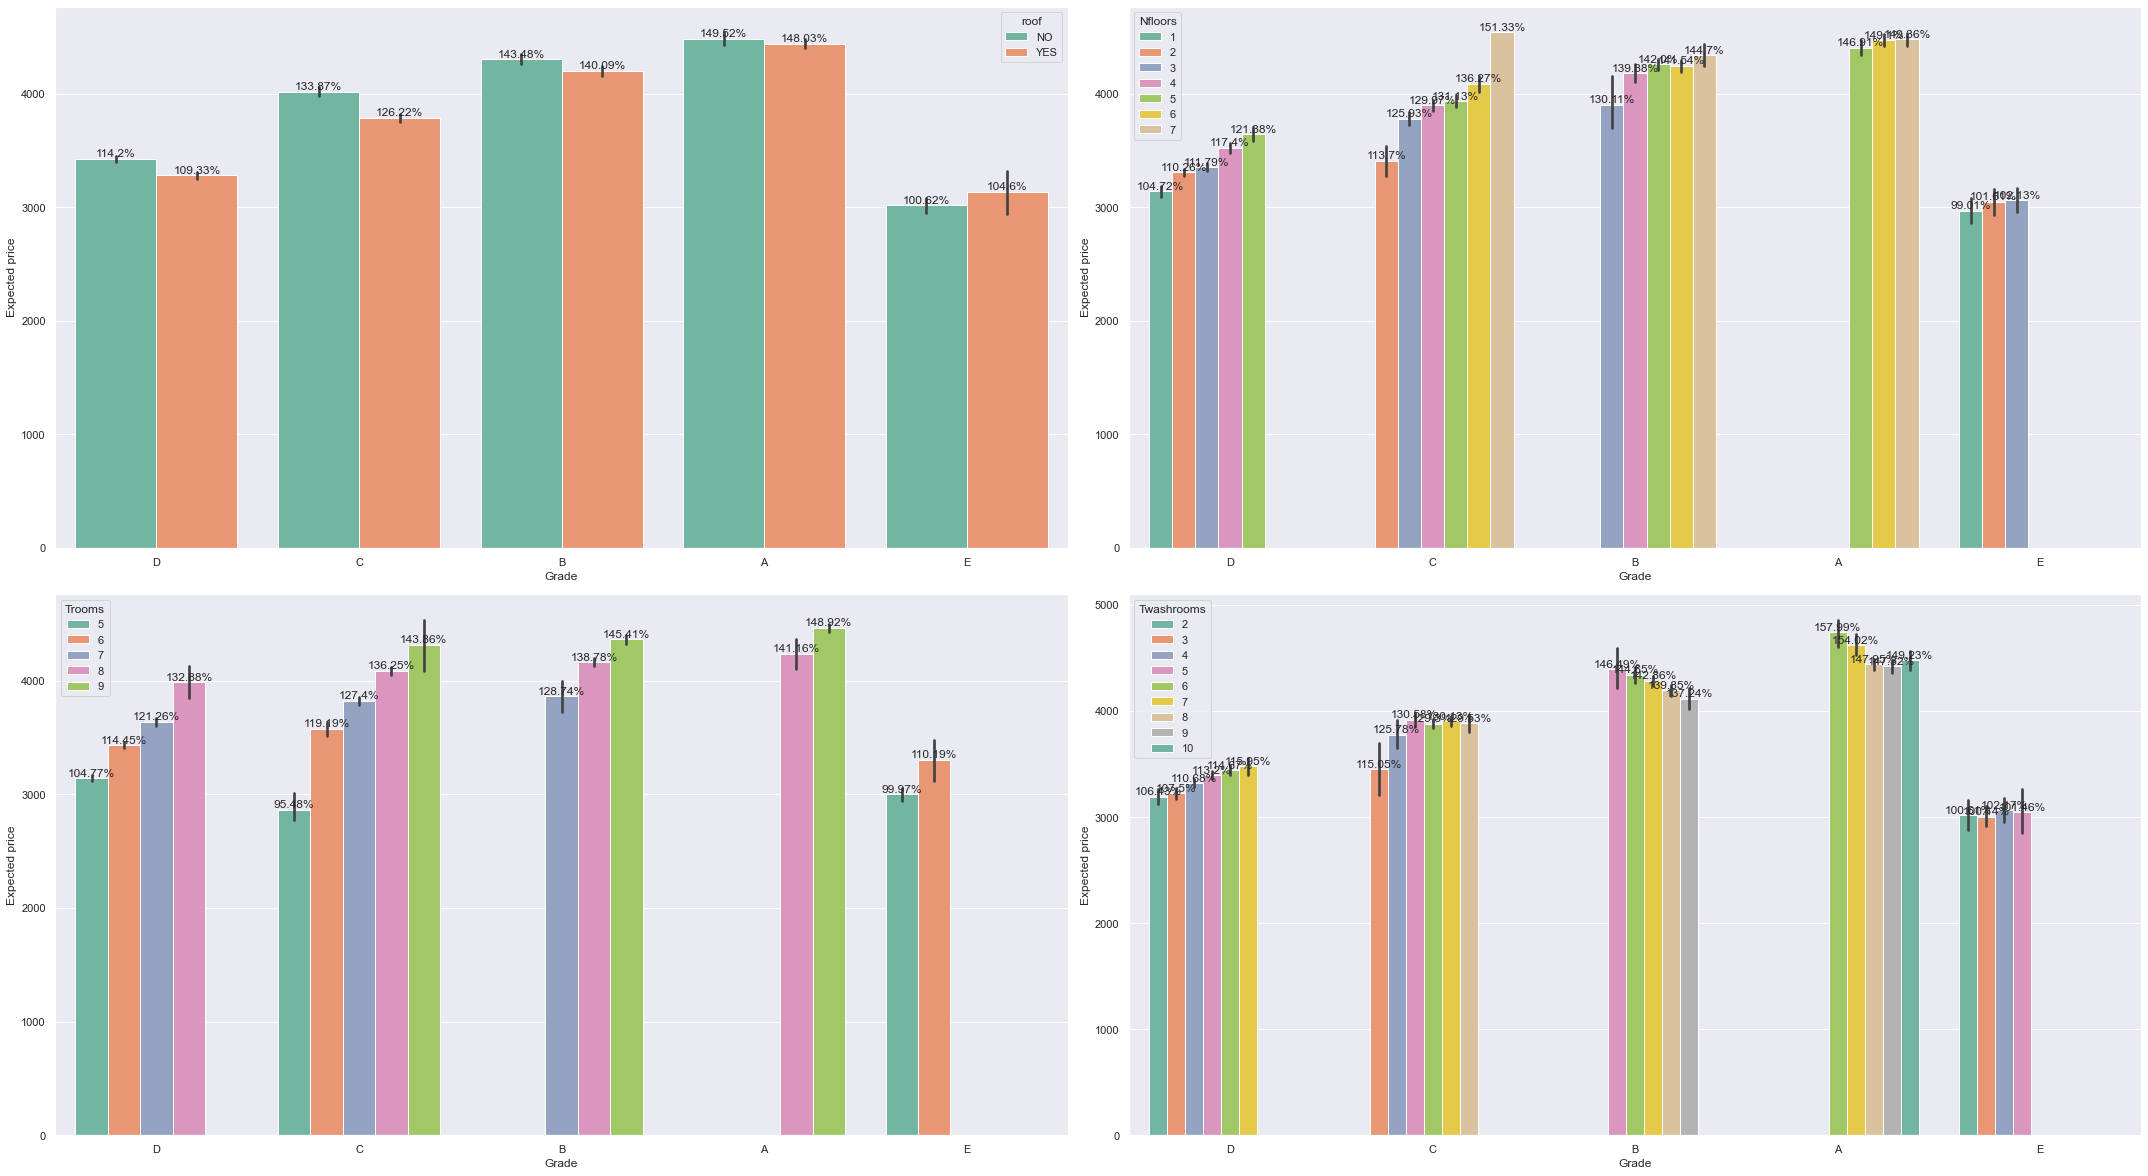

In [10]:
# Plotting the barplot for multivariate analysis

fig, ax = plt.subplots(2,2, tight_layout=True ,figsize=(30,16.5))
bar_percentage(sb.barplot(hue=house_df['roof'],x=house_df['Grade'], y = house_df['Expected price'],palette='Set2', ax=ax[0][0]), len(house_df))
bar_percentage(sb.barplot(hue=house_df['Nfloors'],x=house_df['Grade'], y=house_df['Expected price'],palette='Set2', ax=ax[0][1]), len(house_df))
bar_percentage(sb.barplot(hue=house_df['Trooms'],x=house_df['Grade'],y=house_df['Expected price'], palette="Set2", ax=ax[1][0]), len(house_df))
bar_percentage(sb.barplot(hue=house_df['Twashrooms'],x=house_df['Grade'],y=house_df['Expected price'], palette="Set2", ax=ax[1][1]), len(house_df))

8. For a person who is looking for the affordable and good set of houses where wide variety of rooms, washrooms and bedrooms available C category can be legible and affordable with a reasonable price.

# DATA PREPROCESSING

In [11]:
# FOR TRAIN AND VALIDATION DATA

for i in house_df:
    if house_df[i].dtype == 'object':
        house_df[i] = house_df[i].astype('category')
        house_df[i+'_encoded'] = LabelEncoder().fit_transform(house_df[i])
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Id              3000 non-null   int64   
 1   Area(total)     3000 non-null   int64   
 2   Trooms          3000 non-null   int64   
 3   Nbedrooms       3000 non-null   int64   
 4   Nbwashrooms     3000 non-null   int64   
 5   Twashrooms      3000 non-null   int64   
 6   roof            3000 non-null   category
 7   Roof(Area)      3000 non-null   int64   
 8   Lawn(Area)      3000 non-null   int64   
 9   Nfloors         3000 non-null   int64   
 10  API             3000 non-null   int64   
 11  ANB             3000 non-null   int64   
 12  Expected price  3000 non-null   int64   
 13  Grade           3000 non-null   category
 14  roof_encoded    3000 non-null   int32   
 15  Grade_encoded   3000 non-null   int32   
dtypes: category(2), int32(2), int64(12)
memory usage: 311.0 KB


# FEATURE SCALING AND SELECTION

In [12]:
numeric = ['int64', 'int32', 'float64']
df_after_scaling = pd.DataFrame(MinMaxScaler().fit_transform(house_df[list(house_df.select_dtypes(include=numeric))].to_numpy()), columns = house_df[list(house_df.select_dtypes(include=numeric))].columns)
df_after_scaling.drop(columns=['Grade_encoded'],axis=1,inplace=True)
df_after_scaling = pd.concat([df_after_scaling, house_df['Grade_encoded']],axis=1)
corr = df_after_scaling.corr().style.background_gradient(cmap='coolwarm')
corr

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,roof_encoded,Grade_encoded
Id,1.000000,0.003186,0.003165,0.004814,0.003496,0.001092,0.013046,0.006309,-0.010939,-0.003739,-0.013219,0.009216,0.011059,-0.006074
Area(total),0.003186,1.000000,0.019041,0.031328,0.031819,0.038509,0.017029,-0.002118,0.016819,-0.000182,-0.010846,0.274507,0.014229,-0.177332
Trooms,0.003165,0.019041,1.000000,0.865878,0.827072,0.794870,0.026550,0.009557,0.862367,0.007502,0.007321,0.820170,0.025142,-0.875145
Nbedrooms,0.004814,0.031328,0.865878,1.000000,0.956578,0.919158,0.025073,0.000054,0.742132,0.002820,0.015403,0.715687,0.023058,-0.865389
Nbwashrooms,0.003496,0.031819,0.827072,0.956578,1.000000,0.960007,0.028832,0.006617,0.711936,0.011413,0.008475,0.683659,0.028549,-0.847319
Twashrooms,0.001092,0.038509,0.794870,0.919158,0.960007,1.000000,0.028763,0.008386,0.684966,0.012361,0.016492,0.654627,0.028212,-0.819280
Roof(Area),0.013046,0.017029,0.026550,0.025073,0.028832,0.028763,1.000000,-0.006831,0.013840,-0.006331,-0.015529,0.009346,0.976561,-0.170259
Lawn(Area),0.006309,-0.002118,0.009557,0.000054,0.006617,0.008386,-0.006831,1.000000,0.013771,0.011477,0.025751,0.011561,-0.004640,-0.051200
Nfloors,-0.010939,0.016819,0.862367,0.742132,0.711936,0.684966,0.013840,0.013771,1.000000,-0.002255,0.020614,0.714598,0.014985,-0.787623
API,-0.003739,-0.000182,0.007502,0.002820,0.011413,0.012361,-0.006331,0.011477,-0.002255,1.000000,-0.025694,0.016575,-0.007983,-0.099000


In [13]:
l1 = []

for i in df_after_scaling:
    if abs(df_after_scaling[i].corr(df_after_scaling['Grade_encoded'])) > 0.1:
        l1.append(i)

# New dataframe created

new_scaled_df = df_after_scaling
new_scaled_df

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,roof_encoded,Grade_encoded
0,0.000000,0.700000,0.25,0.500000,0.428571,0.500,0.000000,0.12,0.166667,0.650000,1.0,0.360251,0.0,3
1,0.000333,0.971429,0.00,0.333333,0.285714,0.250,0.591667,0.52,0.333333,0.533333,0.6,0.370944,1.0,3
2,0.000667,0.485714,0.50,0.500000,0.428571,0.375,0.841667,0.94,0.666667,0.400000,0.4,0.458702,1.0,2
3,0.001000,0.571429,0.25,0.333333,0.285714,0.375,0.841667,0.24,0.166667,0.316667,0.2,0.232301,1.0,3
4,0.001334,0.428571,0.50,0.333333,0.428571,0.375,0.000000,0.10,0.333333,0.000000,0.0,0.493732,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.998666,0.728571,1.00,0.666667,0.571429,0.625,0.791667,0.90,0.666667,0.833333,0.2,0.642330,1.0,1
2996,0.999000,0.028571,1.00,1.000000,0.857143,0.750,0.966667,0.34,1.000000,0.950000,0.6,0.460546,1.0,0
2997,0.999333,0.542857,0.50,0.333333,0.285714,0.375,0.000000,0.16,0.666667,0.916667,1.0,0.406711,0.0,3
2998,0.999667,0.042857,1.00,0.833333,0.857143,0.750,0.000000,0.16,1.000000,0.183333,0.4,0.624631,0.0,1


# DATA SPLITTING

In [14]:
X = new_scaled_df.loc[:,new_scaled_df.columns!='Grade_encoded']
y = new_scaled_df['Grade_encoded']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape #, X1.shape, y1.shape

((2400, 13), (600, 13), (2400,), (600,))

# LOGISTIC REGRESSION

In [16]:
logistic = LogisticRegression(C=100.0).fit(X_train, y_train)
logistic_val = logistic.predict(X_test)
logistic_val

array([3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 4, 2, 0, 1, 2, 2, 2, 2, 3, 2, 3, 3,
       3, 3, 2, 2, 0, 3, 3, 1, 3, 3, 0, 3, 3, 3, 3, 3, 0, 1, 3, 1, 0, 1,
       1, 3, 3, 3, 3, 3, 1, 1, 3, 1, 3, 3, 3, 0, 1, 3, 1, 2, 2, 3, 2, 3,
       2, 3, 1, 4, 3, 3, 2, 1, 2, 1, 2, 2, 1, 3, 2, 1, 0, 3, 3, 3, 3, 2,
       1, 1, 3, 3, 2, 3, 3, 3, 2, 0, 2, 3, 2, 3, 3, 1, 1, 0, 0, 3, 3, 3,
       2, 1, 3, 2, 0, 4, 3, 3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 2, 2, 0, 1, 3,
       2, 2, 2, 0, 3, 2, 3, 3, 2, 1, 2, 3, 2, 3, 3, 1, 2, 3, 2, 2, 3, 2,
       3, 1, 2, 2, 3, 2, 2, 3, 1, 1, 2, 3, 3, 3, 3, 2, 3, 2, 2, 0, 1, 3,
       3, 3, 3, 3, 3, 0, 0, 2, 3, 3, 3, 0, 1, 3, 3, 3, 3, 4, 0, 3, 3, 4,
       3, 3, 0, 1, 3, 2, 3, 0, 3, 2, 1, 3, 2, 2, 2, 3, 1, 3, 1, 3, 0, 2,
       3, 4, 0, 2, 2, 1, 3, 3, 3, 2, 3, 3, 1, 3, 3, 3, 1, 2, 3, 2, 3, 0,
       2, 2, 2, 2, 1, 3, 3, 3, 1, 3, 2, 1, 3, 3, 3, 1, 3, 1, 0, 1, 3, 3,
       1, 3, 2, 1, 3, 2, 1, 3, 2, 3, 2, 0, 2, 2, 3, 3, 0, 3, 2, 4, 4, 0,
       3, 0, 2, 3, 3, 2, 3, 3, 4, 1, 2, 2, 3, 0, 3,

In [17]:
param_grid_lr = [{
    'C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0, 50.0, 100.0, 500.0]
}]
grid1 = GridSearchCV(estimator=logistic, param_grid=param_grid_lr, cv=5, scoring='accuracy')
grid1.fit(X_train, y_train)
print(grid1.best_estimator_)

LogisticRegression(C=100.0)


In [18]:
print(f"ACCURACY OF TRAIN SET : {logistic.score(X_train, y_train)}")
logt_recall = recall_score(y_train, logistic.predict(X_train), average='weighted')
logt_f1 = f1_score(y_train, logistic.predict(X_train), average='weighted')
logt_precision = precision_score(y_train, logistic.predict(X_train), average='weighted')
print(f"RECALL SCORE: {logt_recall} \nF1 SCORE: {logt_f1} \nPRECISION: {logt_precision}")

ACCURACY OF TRAIN SET : 0.97375
RECALL SCORE: 0.97375 
F1 SCORE: 0.9737036422301406 
PRECISION: 0.9737829598982055


In [19]:
logistic_acc = accuracy_score(y_test, logistic_val)
print(f"ACCURACY OF TEST SET : {logistic_acc}")
log_recall = recall_score(y_test, logistic_val, average='weighted')
log_f1 = f1_score(y_test, logistic_val, average='weighted')
log_precision = precision_score(y_test, logistic_val, average='weighted')
print(f"RECALL SCORE: {log_recall} \nF1 SCORE: {log_f1} \nPRECISION: {log_precision}")

ACCURACY OF TEST SET : 0.9533333333333334
RECALL SCORE: 0.9533333333333334 
F1 SCORE: 0.9532772227271696 
PRECISION: 0.953594704458232


In [20]:
log_df = pd.DataFrame([y_test.values, logistic_val], index=[['Actual', 'Predicted']])
log_df.T

,Actual,Predicted
0,3,3
1,3,3
2,2,2
3,3,3
4,1,1
...,...,...
595,2,2
596,3,3
597,0,0
598,3,3


<AxesSubplot:title={'center':'Confusion Matrix Logistic Regression'}>

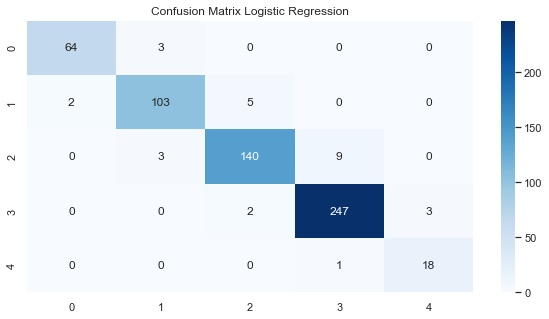

In [21]:
fig, ax = plt.subplots(figsize = (10,5))
log_con = confusion_matrix(y_test,logistic_val)
# When label = (1,0) the value are in structure Tp,Fn,Fp,Tn
ax.set_title('Confusion Matrix Logistic Regression')  
sb.heatmap(log_con, annot = True,cmap = 'Blues',fmt='g')

***CROSS VALIDATION OF LOGISTIC REGRESSION***

In [22]:
names, results=[],[]
#cross validation of Logistic regression

# evaluate the model
cv =RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores1 = cross_val_score(logistic,X,y, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')

results.append(n_scores1)
names.append('log')

# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scores1), std(n_scores1)))

F1-Score: 0.962 (0.010)


In [23]:
names1, results1=[],[]
#cross validation of Logistic regression

# evaluate the model
cv =RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores1a = cross_val_score(logistic,X,y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

results1.append(n_scores1a)
names1.append('log')

# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scores1a), std(n_scores1a)))

F1-Score: 0.963 (0.010)


In [24]:
names2, results2=[],[]
#cross validation of Logistic regression

# evaluate the model
cv =RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores1r = cross_val_score(logistic,X,y, scoring='recall_weighted', cv=cv, n_jobs=-1, error_score='raise')

results2.append(n_scores1r)
names2.append('log')

# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scores1r), std(n_scores1r)))

F1-Score: 0.963 (0.010)


In [25]:
names3, results3=[],[]
#cross validation of Logistic regression

# evaluate the model
cv =RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores1p = cross_val_score(logistic,X,y, scoring='precision_weighted', cv=cv, n_jobs=-1, error_score='raise')

results3.append(n_scores1p)
names3.append('log')

# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scores1p), std(n_scores1p)))

F1-Score: 0.963 (0.010)


# NAIVE BAYES CLASSIFICATION

In [26]:
naive_bayes = GaussianNB(var_smoothing=0.2848035868435802).fit(X_train, y_train)
nb_val = naive_bayes.predict(X_test)
nb_val

array([3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 0, 1, 1, 1, 2, 2, 3, 2, 3, 3,
       3, 3, 2, 2, 0, 3, 3, 1, 2, 3, 0, 2, 3, 3, 3, 3, 0, 1, 3, 0, 0, 1,
       1, 2, 3, 3, 3, 3, 1, 1, 3, 1, 3, 3, 3, 0, 1, 3, 1, 2, 2, 3, 2, 2,
       1, 3, 1, 4, 2, 3, 2, 1, 2, 1, 2, 2, 2, 3, 2, 2, 0, 3, 3, 3, 3, 2,
       1, 1, 3, 3, 1, 3, 2, 3, 2, 0, 1, 3, 3, 3, 3, 1, 1, 0, 0, 3, 3, 2,
       2, 1, 3, 3, 0, 4, 3, 3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 3, 2, 0, 1, 3,
       2, 2, 1, 0, 3, 1, 3, 3, 3, 1, 2, 2, 2, 2, 3, 1, 2, 3, 2, 2, 3, 2,
       3, 1, 1, 2, 3, 2, 2, 3, 2, 1, 3, 3, 3, 3, 3, 2, 3, 2, 1, 0, 1, 3,
       3, 3, 3, 2, 3, 0, 0, 1, 3, 3, 2, 0, 1, 3, 3, 2, 3, 4, 0, 3, 3, 4,
       3, 3, 1, 1, 2, 2, 3, 0, 3, 2, 1, 3, 2, 2, 1, 3, 1, 3, 1, 3, 0, 1,
       3, 3, 0, 2, 2, 1, 2, 3, 3, 3, 2, 3, 1, 3, 3, 3, 2, 2, 3, 2, 3, 0,
       2, 2, 2, 3, 1, 3, 3, 3, 2, 3, 2, 1, 3, 3, 3, 1, 3, 1, 0, 2, 3, 3,
       1, 3, 1, 2, 3, 2, 1, 3, 2, 2, 2, 0, 2, 2, 3, 3, 0, 3, 2, 3, 4, 1,
       3, 0, 2, 3, 3, 3, 3, 3, 3, 1, 2, 2, 3, 1, 3,

In [27]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
grid2 = GridSearchCV(estimator=naive_bayes,verbose=1, param_grid=params_NB, cv=5, scoring='accuracy')
grid2.fit(X_train, y_train)
print(grid2.best_estimator_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
GaussianNB(var_smoothing=0.2848035868435802)


In [28]:
print(f"ACCURACY OF TRAIN SET : {naive_bayes.score(X_train, y_train)}")
nbt_recall = recall_score(y_train, naive_bayes.predict(X_train), average='weighted')
nbt_f1 = f1_score(y_train, naive_bayes.predict(X_train), average='weighted')
nbt_precision = precision_score(y_train, naive_bayes.predict(X_train), average='weighted')
print(f"RECALL SCORE: {nbt_recall} \nF1 SCORE: {nbt_f1} \nPRECISION: {nbt_precision}")

ACCURACY OF TRAIN SET : 0.8508333333333333
RECALL SCORE: 0.8508333333333333 
F1 SCORE: 0.8510191790562313 
PRECISION: 0.8537397058214133


In [29]:
nb_acc = accuracy_score(y_test, logistic_val)
print(f"ACCURACY OF TEST SET : {nb_acc}")
nb_recall = recall_score(y_test, nb_val, average='weighted')
nb_f1 = f1_score(y_test, nb_val, average='weighted')
nb_precision = precision_score(y_test, nb_val, average='weighted')
print(f"RECALL SCORE: {nb_recall} \nF1 SCORE: {nb_f1} \nPRECISION: {nb_precision}")

ACCURACY OF TEST SET : 0.9533333333333334
RECALL SCORE: 0.81 
F1 SCORE: 0.8084838607655594 
PRECISION: 0.8140337321542775


In [30]:
nb_df = pd.DataFrame([y_test.values, nb_val], index=[['Actual', 'Predicted']])
nb_df.T

,Actual,Predicted
0,3,3
1,3,3
2,2,2
3,3,3
4,1,1
...,...,...
595,2,3
596,3,3
597,0,0
598,3,3


<AxesSubplot:title={'center':'Confusion Matrix Naive Bayes'}>

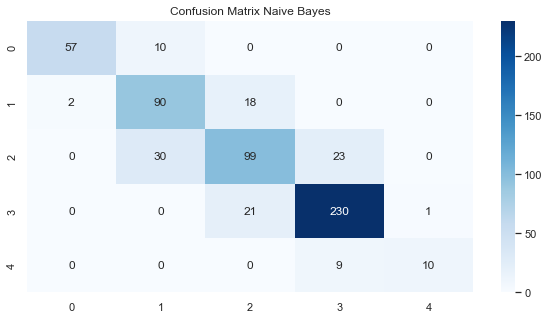

In [31]:
fig, ax = plt.subplots(figsize = (10,5))
log_con = confusion_matrix(y_test,nb_val)
# When label = (1,0) the value are in structure Tp,Fn,Fp,Tn
ax.set_title('Confusion Matrix Naive Bayes')  
sb.heatmap(log_con, annot = True,cmap = 'Blues',fmt='g')

***CROSS VALIDATION OF NAIVE BAYES***

In [32]:
#cross validation of Naive Bayes

# evaluate the model
cv =RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores2 = cross_val_score(naive_bayes,X,y, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')

results.append(n_scores2)
names.append('nb')

# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scores2), std(n_scores2)))

F1-Score: 0.839 (0.025)


In [33]:
#cross validation of Naive Bayes

# evaluate the model
cv =RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores2a = cross_val_score(naive_bayes,X,y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

results1.append(n_scores2a)
names1.append('nb')

# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scores2a), std(n_scores2a)))

F1-Score: 0.840 (0.026)


In [34]:
#cross validation of Naive Bayes

# evaluate the model
cv =RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores2r = cross_val_score(naive_bayes,X,y, scoring='recall_weighted', cv=cv, n_jobs=-1, error_score='raise')

results2.append(n_scores2r)
names2.append('nb')

# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scores2r), std(n_scores2r)))

F1-Score: 0.840 (0.026)


In [35]:
#cross validation of Naive Bayes

# evaluate the model
cv =RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores2p = cross_val_score(naive_bayes,X,y, scoring='precision_weighted', cv=cv, n_jobs=-1, error_score='raise')

results3.append(n_scores2p)
names3.append('nb')

# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scores2p), std(n_scores2p)))

F1-Score: 0.846 (0.024)


# DECISION TREE CLASSIFIER

In [36]:
decision_tree = DecisionTreeClassifier(max_depth=8, min_samples_leaf=6).fit(X_train, y_train)
decision_val = decision_tree.predict(X_test)
decision_val

array([3, 3, 2, 3, 1, 3, 3, 3, 4, 3, 4, 2, 0, 1, 2, 2, 2, 2, 3, 2, 3, 3,
       3, 3, 2, 2, 0, 3, 2, 0, 3, 3, 0, 3, 3, 3, 3, 3, 0, 1, 3, 1, 0, 1,
       1, 3, 3, 3, 3, 3, 1, 1, 3, 1, 3, 3, 3, 0, 1, 3, 1, 2, 2, 3, 2, 3,
       2, 3, 1, 4, 2, 3, 2, 1, 2, 1, 1, 2, 1, 3, 2, 1, 0, 3, 3, 3, 3, 2,
       1, 1, 3, 3, 2, 3, 2, 3, 1, 0, 2, 3, 2, 3, 3, 1, 1, 0, 0, 3, 3, 3,
       2, 1, 3, 2, 0, 3, 3, 3, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 2, 0, 0, 3,
       3, 2, 2, 0, 3, 1, 3, 3, 2, 1, 2, 2, 2, 2, 3, 2, 1, 3, 2, 2, 3, 1,
       3, 1, 2, 2, 3, 2, 2, 3, 1, 1, 2, 3, 3, 3, 3, 2, 3, 2, 1, 0, 1, 3,
       3, 3, 3, 2, 3, 0, 0, 2, 3, 3, 2, 0, 0, 3, 3, 3, 3, 4, 0, 3, 3, 4,
       4, 3, 0, 1, 3, 3, 3, 0, 3, 2, 1, 3, 2, 2, 2, 3, 1, 3, 2, 3, 0, 2,
       3, 4, 0, 2, 2, 1, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 2, 3, 2, 3, 0,
       2, 1, 2, 3, 1, 3, 3, 3, 1, 3, 2, 1, 3, 3, 3, 1, 3, 1, 0, 2, 3, 3,
       1, 3, 2, 1, 3, 2, 1, 3, 2, 3, 2, 0, 2, 2, 3, 3, 0, 3, 2, 3, 3, 1,
       3, 0, 2, 3, 3, 2, 3, 3, 4, 1, 2, 2, 3, 1, 3,

In [37]:
    params1 = {
        'max_depth': list(range(1,20)),
        'min_samples_leaf': list(range(5,30,1))
    }
    grid3 = GridSearchCV(estimator=decision_tree, param_grid=params1, cv=5, verbose = 1, scoring='accuracy')
    grid3.fit(X_train, y_train)
    print(grid3.best_estimator_)

Fitting 5 folds for each of 475 candidates, totalling 2375 fits
DecisionTreeClassifier(max_depth=9, min_samples_leaf=7)


In [38]:
print(f"ACCURACY OF TRAIN SET : {decision_tree.score(X_train, y_train)}")
dtt_recall = recall_score(y_train, decision_tree.predict(X_train), average='weighted')
dtt_f1 = f1_score(y_train, decision_tree.predict(X_train), average='weighted')
dtt_precision = precision_score(y_train, decision_tree.predict(X_train), average='weighted')
print(f"RECALL SCORE: {dtt_recall} \nF1 SCORE: {dtt_f1} \nPRECISION: {dtt_precision}")

ACCURACY OF TRAIN SET : 0.9266666666666666
RECALL SCORE: 0.9266666666666666 
F1 SCORE: 0.9263899545271737 
PRECISION: 0.9264270087365141


In [39]:
dt_acc = accuracy_score(y_test, decision_val)
print(f"ACCURACY OF TEST SET : {dt_acc}")
dt_recall = recall_score(y_test, decision_val, average='weighted')
dt_f1 = f1_score(y_test, decision_val, average='weighted')
dt_precision = precision_score(y_test, decision_val, average='weighted')
print(f"RECALL SCORE: {dt_recall} \nF1 SCORE: {dt_f1} \nPRECISION: {dt_precision}")

ACCURACY OF TEST SET : 0.8566666666666667
RECALL SCORE: 0.8566666666666667 
F1 SCORE: 0.8538482261456583 
PRECISION: 0.8532690439066278


In [40]:
dt_df = pd.DataFrame([y_test.values, decision_val], index=[['Actual', 'Predicted']])
dt_df.T

,Actual,Predicted
0,3,3
1,3,3
2,2,2
3,3,3
4,1,1
...,...,...
595,2,3
596,3,3
597,0,0
598,3,3


<AxesSubplot:title={'center':'Confusion Matrix Decision Tree'}>

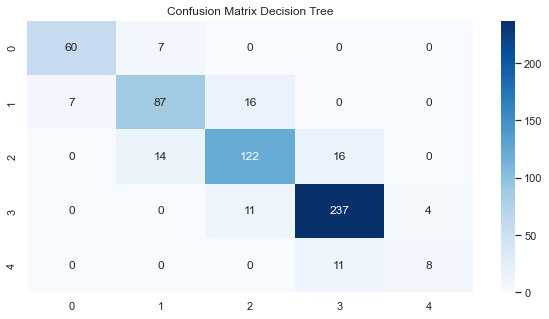

In [41]:
fig, ax = plt.subplots(figsize = (10,5))
log_con = confusion_matrix(y_test,decision_val)
# When label = (1,0) the value are in structure Tp,Fn,Fp,Tn
ax.set_title('Confusion Matrix Decision Tree')  
sb.heatmap(log_con, annot = True,cmap = 'Blues',fmt='g')

***CROSS VALIDATION OF DECISION TREE***

In [42]:
# evaluate the model
cv =RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores3 = cross_val_score(decision_tree,X,y, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')

results.append(n_scores3)
names.append('dt')

# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scores3), std(n_scores3)))

F1-Score: 0.851 (0.022)


In [43]:
# evaluate the model
cv =RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores3a = cross_val_score(decision_tree,X,y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

results1.append(n_scores3a)
names1.append('dt')

# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scores3a), std(n_scores3a)))

F1-Score: 0.853 (0.022)


In [44]:
# evaluate the model
cv =RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores3r = cross_val_score(decision_tree,X,y, scoring='recall_weighted', cv=cv, n_jobs=-1, error_score='raise')

results2.append(n_scores3r)
names2.append('dt')

# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scores3r), std(n_scores3r)))

F1-Score: 0.852 (0.022)


In [45]:
# evaluate the model
cv =RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores3p = cross_val_score(decision_tree,X,y, scoring='precision_weighted', cv=cv, n_jobs=-1, error_score='raise')

results3.append(n_scores3p)
names3.append('dt')

# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scores3p), std(n_scores3p)))

F1-Score: 0.856 (0.024)


# RANDOM FOREST

In [46]:
random_forest = RandomForestClassifier(max_depth=8, min_samples_leaf=5, n_estimators=30).fit(X_train, y_train)
random_val = random_forest.predict(X_test)
random_val

array([3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 4, 3, 0, 1, 1, 2, 2, 2, 3, 2, 3, 3,
       3, 3, 2, 2, 0, 3, 3, 1, 3, 3, 0, 2, 3, 3, 3, 3, 0, 1, 3, 0, 0, 1,
       1, 3, 3, 3, 3, 3, 1, 1, 3, 1, 3, 3, 3, 0, 1, 3, 2, 2, 2, 3, 2, 2,
       2, 3, 1, 4, 2, 3, 2, 1, 2, 1, 2, 2, 1, 3, 2, 2, 0, 3, 3, 3, 3, 2,
       1, 2, 3, 3, 2, 3, 2, 3, 2, 0, 2, 3, 3, 3, 3, 1, 1, 0, 0, 3, 3, 2,
       2, 1, 3, 2, 0, 3, 3, 3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 2, 2, 0, 1, 3,
       2, 2, 2, 0, 3, 2, 3, 3, 2, 1, 2, 3, 2, 2, 3, 1, 2, 3, 2, 2, 3, 2,
       3, 0, 2, 2, 3, 2, 2, 3, 2, 1, 3, 3, 3, 3, 3, 2, 3, 2, 1, 0, 2, 3,
       3, 3, 3, 2, 3, 0, 0, 2, 3, 3, 2, 0, 1, 3, 3, 3, 3, 3, 0, 3, 3, 3,
       3, 3, 1, 1, 3, 2, 3, 0, 3, 2, 1, 3, 2, 2, 2, 3, 1, 3, 1, 3, 0, 2,
       3, 3, 0, 2, 2, 1, 2, 3, 3, 2, 2, 3, 1, 3, 3, 3, 2, 2, 3, 2, 3, 0,
       2, 1, 2, 3, 1, 3, 3, 3, 1, 3, 2, 1, 3, 3, 3, 1, 3, 1, 0, 2, 3, 3,
       1, 3, 2, 2, 3, 2, 1, 3, 2, 3, 2, 0, 2, 2, 3, 3, 0, 3, 2, 3, 4, 1,
       3, 0, 2, 3, 3, 2, 3, 3, 3, 1, 2, 2, 3, 1, 3,

In [47]:
    params = {
        'max_depth': [1,2,3,4,5,6,7,8],
        'min_samples_leaf': [5,10,20],
        'n_estimators': [10,25,30]
    }
    grid4 = GridSearchCV(estimator=random_forest, param_grid=params, cv=5, n_jobs=-1, verbose = 1, scoring='accuracy')
    grid4.fit(X_train, y_train)
    print(grid4.best_estimator_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
RandomForestClassifier(max_depth=8, min_samples_leaf=5, n_estimators=30)


In [48]:
print(f"ACCURACY OF TRAIN SET : {random_forest.score(X_train, y_train)}")
rfgt_recall = recall_score(y_train, random_forest.predict(X_train), average='weighted')
rfgt_f1 = f1_score(y_train, random_forest.predict(X_train), average='weighted')
rfgt_precision = precision_score(y_train, random_forest.predict(X_train), average='weighted')
print(f"RECALL SCORE: {rfgt_recall} \nF1 SCORE: {rfgt_f1} \nPRECISION: {rfgt_precision}")

ACCURACY OF TRAIN SET : 0.9266666666666666
RECALL SCORE: 0.9266666666666666 
F1 SCORE: 0.9239016524540996 
PRECISION: 0.9281858641696105


In [49]:
rfg_acc = accuracy_score(y_test, random_val)
print(f"ACCURACY OF TEST SET : {rfg_acc}")
rfg_recall = recall_score(y_test, random_val, average='weighted')
rfg_f1 = f1_score(y_test, random_val, average='weighted')
rfg_precision = precision_score(y_test, random_val, average='weighted')
print(f"RECALL SCORE: {rfg_recall} \nF1 SCORE: {rfg_f1} \nPRECISION: {rfg_precision}")

ACCURACY OF TEST SET : 0.87
RECALL SCORE: 0.87 
F1 SCORE: 0.861429427606602 
PRECISION: 0.8674489582389682


In [50]:
rfg_df = pd.DataFrame([y_test.values, random_val], index=[['Actual', 'Predicted']])
rfg_df.T

,Actual,Predicted
0,3,3
1,3,3
2,2,2
3,3,3
4,1,1
...,...,...
595,2,3
596,3,3
597,0,0
598,3,3


<AxesSubplot:title={'center':'Confusion Matrix Random Forest'}>

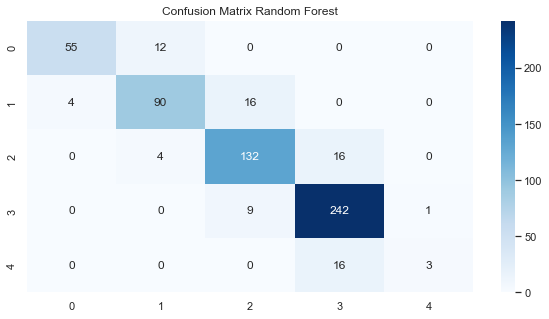

In [88]:
fig, ax = plt.subplots(figsize = (10,5))
log_con = confusion_matrix(y_test,random_val)
# When label = (1,0) the value are in structure Tp,Fn,Fp,Tn
ax.set_title('Confusion Matrix Random Forest')  
sb.heatmap(log_con, annot = True,cmap = 'Blues',fmt='g')

***CROSS VALIDATION OF RANDOM FOREST***

In [51]:
# evaluate the model
cv =RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores4 = cross_val_score(random_forest,X,y, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')

results.append(n_scores4)
names.append('rfg')

# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scores4), std(n_scores4)))

F1-Score: 0.871 (0.016)


In [52]:
# evaluate the model
cv =RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores4a = cross_val_score(random_forest,X,y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

results1.append(n_scores4a)
names1.append('rfg')

# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scores4a), std(n_scores4a)))

F1-Score: 0.877 (0.021)


In [53]:
# evaluate the model
cv =RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores4r = cross_val_score(random_forest,X,y, scoring='recall_weighted', cv=cv, n_jobs=-1, error_score='raise')

results2.append(n_scores4r)
names2.append('rfg')

# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scores4r), std(n_scores4r)))

F1-Score: 0.874 (0.017)


In [54]:
# evaluate the model
cv =RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores4p = cross_val_score(random_forest,X,y, scoring='precision_weighted', cv=cv, n_jobs=-1, error_score='raise')

results3.append(n_scores4p)
names3.append('rfg')

# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scores4p), std(n_scores4p)))

F1-Score: 0.873 (0.022)


# KNN

In [55]:
knn = KNeighborsClassifier(n_neighbors=19).fit(X_train, y_train)
knn_val = knn.predict(X_test)
knn_val

array([3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 2, 0, 0, 1, 2, 2, 1, 3, 2, 3, 3,
       3, 3, 2, 2, 0, 3, 3, 1, 3, 3, 0, 2, 3, 3, 3, 3, 1, 1, 3, 0, 0, 1,
       0, 3, 3, 3, 3, 3, 1, 1, 3, 2, 3, 3, 3, 0, 1, 3, 1, 2, 2, 3, 3, 3,
       2, 3, 1, 4, 3, 3, 2, 1, 2, 1, 2, 2, 1, 3, 2, 1, 0, 3, 3, 3, 3, 2,
       2, 2, 3, 3, 2, 3, 2, 3, 1, 0, 2, 3, 3, 3, 3, 1, 1, 0, 0, 3, 3, 3,
       2, 1, 3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 3, 2, 0, 1, 3,
       2, 2, 2, 0, 3, 2, 3, 3, 2, 1, 2, 3, 2, 3, 3, 1, 2, 3, 2, 1, 3, 2,
       3, 1, 2, 2, 3, 2, 2, 3, 1, 1, 3, 3, 3, 3, 3, 2, 3, 2, 2, 0, 2, 3,
       3, 3, 3, 3, 3, 0, 0, 1, 3, 3, 3, 0, 1, 3, 3, 2, 3, 4, 0, 3, 3, 3,
       3, 3, 0, 1, 3, 2, 3, 0, 3, 2, 1, 3, 2, 2, 2, 3, 1, 3, 2, 3, 0, 2,
       3, 3, 0, 2, 2, 1, 2, 3, 3, 3, 2, 3, 1, 3, 3, 3, 1, 2, 3, 2, 3, 0,
       2, 1, 2, 3, 2, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 1, 3, 1, 0, 2, 3, 3,
       2, 3, 2, 1, 3, 2, 1, 3, 2, 3, 2, 0, 2, 2, 3, 3, 0, 3, 2, 3, 4, 1,
       3, 0, 2, 3, 3, 2, 3, 3, 3, 1, 2, 3, 3, 0, 3,

In [56]:
parameters = {'n_neighbors':list(range(1,20))}
grid5 = GridSearchCV(estimator=knn, param_grid=parameters, cv=5, n_jobs=-1, verbose = 1, scoring='accuracy')
grid5.fit(X_train, y_train)
print(grid5.best_estimator_)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
KNeighborsClassifier(n_neighbors=19)


In [57]:
print(f"ACCURACY OF TRAIN SET : {knn.score(X_train, y_train)}")
knnt_recall = recall_score(y_train, knn.predict(X_train), average='weighted')
knnt_f1 = f1_score(y_train, knn.predict(X_train), average='weighted')
knnt_precision = precision_score(y_train, knn.predict(X_train), average='weighted')
print(f"RECALL SCORE: {knnt_recall} \nF1 SCORE: {knnt_f1} \nPRECISION: {knnt_precision}")

ACCURACY OF TRAIN SET : 0.9045833333333333
RECALL SCORE: 0.9045833333333333 
F1 SCORE: 0.9027433775795777 
PRECISION: 0.9057788957142884


In [58]:
knn_acc = accuracy_score(y_test, knn_val)
print(f"ACCURACY OF TEST SET : {knn_acc}")
knn_recall = recall_score(y_test, knn_val, average='weighted')
knn_f1 = f1_score(y_test, knn_val, average='weighted')
knn_precision = precision_score(y_test, knn_val, average='weighted')
print(f"RECALL SCORE: {knn_recall} \nF1 SCORE: {knn_f1} \nPRECISION: {knn_precision}")

ACCURACY OF TEST SET : 0.8666666666666667
RECALL SCORE: 0.8666666666666667 
F1 SCORE: 0.8571875302637492 
PRECISION: 0.8712886176045458


In [59]:
knn_df = pd.DataFrame([y_test.values, knn_val], index=[['Actual', 'Predicted']])
knn_df.T

,Actual,Predicted
0,3,3
1,3,3
2,2,2
3,3,3
4,1,1
...,...,...
595,2,2
596,3,3
597,0,0
598,3,3


<AxesSubplot:title={'center':'Confusion Matrix KNN'}>

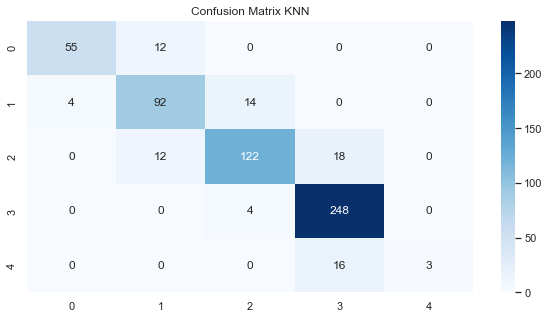

In [89]:
fig, ax = plt.subplots(figsize = (10,5))
log_con = confusion_matrix(y_test,knn_val)
# When label = (1,0) the value are in structure Tp,Fn,Fp,Tn
ax.set_title('Confusion Matrix KNN')  
sb.heatmap(log_con, annot = True,cmap = 'Blues',fmt='g')

***CROSS VALIDATION OF KNN***

In [60]:
# evaluate the model
cv =RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores5 = cross_val_score(knn,X,y, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')

results.append(n_scores5)
names.append('knn')

# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scores5), std(n_scores5)))

F1-Score: 0.875 (0.015)


In [61]:
# evaluate the model
cv =RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores5a = cross_val_score(knn,X,y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

results1.append(n_scores5a)
names1.append('knn')

# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scores5a), std(n_scores5a)))

F1-Score: 0.880 (0.014)


In [62]:
# evaluate the model
cv =RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores5r = cross_val_score(knn,X,y, scoring='recall_weighted', cv=cv, n_jobs=-1, error_score='raise')

results2.append(n_scores5r)
names2.append('knn')

# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scores5r), std(n_scores5r)))

F1-Score: 0.880 (0.014)


In [63]:
# evaluate the model
cv =RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores5p = cross_val_score(knn,X,y, scoring='precision_weighted', cv=cv, n_jobs=-1, error_score='raise')

results3.append(n_scores5)
names3.append('knn')

# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scores5p), std(n_scores5p)))

F1-Score: 0.881 (0.014)


# ADABOOST

In [64]:
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                         min_samples_leaf=10),
                   learning_rate=0.1).fit(X_train, y_train)
ada_val = ada.predict(X_test)
ada_val

array([3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 2, 0, 1, 1, 2, 2, 1, 3, 2, 3, 3,
       3, 3, 2, 2, 0, 3, 3, 1, 3, 3, 0, 2, 3, 3, 3, 3, 0, 1, 3, 1, 0, 1,
       1, 3, 3, 3, 3, 3, 1, 1, 3, 1, 3, 3, 3, 0, 1, 3, 2, 2, 2, 3, 2, 3,
       2, 3, 1, 4, 2, 3, 2, 1, 2, 1, 2, 2, 1, 3, 2, 2, 0, 3, 3, 3, 3, 2,
       1, 1, 3, 3, 2, 3, 2, 3, 2, 0, 2, 3, 3, 3, 3, 1, 1, 0, 0, 3, 3, 2,
       2, 1, 3, 2, 0, 4, 3, 3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 2, 2, 0, 1, 3,
       2, 2, 2, 0, 2, 2, 3, 3, 2, 1, 2, 3, 2, 3, 3, 1, 2, 3, 2, 2, 2, 2,
       3, 0, 2, 2, 3, 2, 2, 3, 2, 1, 2, 3, 3, 3, 3, 2, 3, 2, 1, 0, 2, 3,
       3, 3, 3, 3, 3, 0, 0, 2, 3, 3, 2, 0, 1, 3, 3, 3, 3, 3, 0, 3, 3, 4,
       3, 3, 1, 1, 3, 2, 3, 0, 3, 2, 2, 3, 2, 2, 2, 3, 1, 3, 1, 3, 0, 2,
       3, 3, 0, 2, 1, 1, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3, 2, 2, 3, 2, 3, 0,
       2, 2, 2, 3, 1, 3, 3, 3, 1, 3, 2, 1, 3, 3, 3, 1, 3, 1, 0, 1, 3, 3,
       1, 3, 2, 1, 3, 2, 1, 3, 2, 3, 2, 0, 2, 2, 2, 3, 0, 3, 2, 3, 4, 1,
       3, 0, 2, 3, 3, 2, 3, 3, 3, 1, 2, 2, 3, 0, 3,

In [65]:
parameters1 = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50],
              'learning_rate':[0.01,0.1]}
grid6 = GridSearchCV(estimator=ada, param_grid=parameters1, cv=5, n_jobs=-1, verbose = 1, scoring='accuracy')
grid6.fit(X_train, y_train)
print(grid6.best_estimator_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                         min_samples_leaf=10),
                   learning_rate=0.1)


In [66]:
print(f"ACCURACY OF TRAIN SET : {ada.score(X_train, y_train)}")
adat_recall = recall_score(y_train, ada.predict(X_train), average='weighted')
adat_f1 = f1_score(y_train, ada.predict(X_train), average='weighted')
adat_precision = precision_score(y_train, ada.predict(X_train), average='weighted')
print(f"RECALL SCORE: {adat_recall} \nF1 SCORE: {adat_f1} \nPRECISION: {adat_precision}")

ACCURACY OF TRAIN SET : 1.0
RECALL SCORE: 1.0 
F1 SCORE: 1.0 
PRECISION: 1.0


In [67]:
ada_acc = accuracy_score(y_test, ada_val)
print(f"ACCURACY OF TEST SET : {ada_acc}")
ada_recall = recall_score(y_test, ada_val, average='weighted')
ada_f1 = f1_score(y_test, ada_val, average='weighted')
ada_precision = precision_score(y_test, ada_val, average='weighted')
print(f"RECALL SCORE: {ada_recall} \nF1 SCORE: {ada_f1} \nPRECISION: {ada_precision}")

ACCURACY OF TEST SET : 0.8933333333333333
RECALL SCORE: 0.8933333333333333 
F1 SCORE: 0.8881772681265555 
PRECISION: 0.8959123744811113


In [68]:
ada_df = pd.DataFrame([y_test.values, ada_val], index=[['Actual', 'Predicted']])
ada_df.T

,Actual,Predicted
0,3,3
1,3,3
2,2,2
3,3,3
4,1,1
...,...,...
595,2,3
596,3,3
597,0,0
598,3,3


<AxesSubplot:title={'center':'Confusion Matrix Adaboost'}>

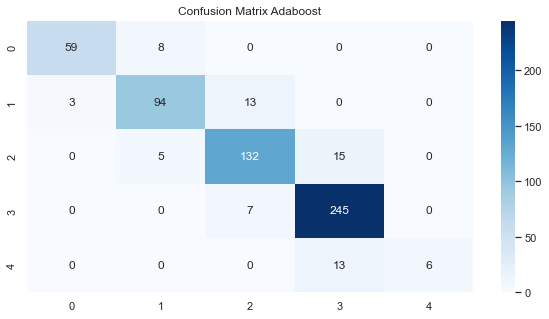

In [90]:
fig, ax = plt.subplots(figsize = (10,5))
log_con = confusion_matrix(y_test,ada_val)
# When label = (1,0) the value are in structure Tp,Fn,Fp,Tn
ax.set_title('Confusion Matrix Adaboost')  
sb.heatmap(log_con, annot = True,cmap = 'Blues',fmt='g')

***CROSS VALIDATION OF ADABOOST***

In [69]:
# evaluate the model
cv =RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores6 = cross_val_score(ada,X,y, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')

results.append(n_scores6)
names.append('ada')

# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scores6), std(n_scores6)))

F1-Score: 0.900 (0.019)


In [70]:
# evaluate the model
cv =RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores6a = cross_val_score(ada,X,y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

results1.append(n_scores6a)
names1.append('ada')

# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scores6a), std(n_scores6a)))

F1-Score: 0.905 (0.019)


In [71]:
# evaluate the model
cv =RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores6r = cross_val_score(ada,X,y, scoring='recall_weighted', cv=cv, n_jobs=-1, error_score='raise')

results2.append(n_scores6r)
names2.append('ada')

# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scores6r), std(n_scores6r)))

F1-Score: 0.907 (0.017)


In [72]:
# evaluate the model
cv =RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores6p = cross_val_score(ada,X,y, scoring='precision_weighted', cv=cv, n_jobs=-1, error_score='raise')

results3.append(n_scores6p)
names3.append('ada')

# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scores6p), std(n_scores6p)))

F1-Score: 0.906 (0.015)


# STACKING

In [73]:
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('rfg', RandomForestClassifier(max_depth=8, min_samples_leaf=5, n_estimators=25)))
    level0.append(('log', LogisticRegression(C=100.0)))
    level0.append(('knn', KNeighborsClassifier(n_neighbors=13)))
    level0.append(('cart', DecisionTreeClassifier(max_depth=13, min_samples_leaf=7)))
    level0.append(('svm', SVC()))
    level0.append(('nb', GaussianNB(var_smoothing=0.2848035868435802)))
    # define meta learner model
    level1 = GaussianNB(var_smoothing=0.2848035868435802)
    # define the stacking ensemble
    model_s = StackingClassifier(estimators=level0, final_estimator=level1, cv=10)
    return model_s

In [74]:
stacking_model = get_stacking().fit(X_train, y_train)
stacking_validation = stacking_model.predict(X_test)
stacking_validation

array([3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 4, 2, 0, 1, 1, 2, 2, 2, 3, 2, 3, 3,
       3, 3, 2, 2, 0, 3, 3, 1, 3, 3, 0, 2, 3, 3, 3, 3, 0, 1, 3, 0, 0, 1,
       1, 3, 3, 3, 3, 3, 1, 1, 3, 1, 3, 3, 3, 0, 1, 3, 1, 2, 2, 3, 2, 3,
       2, 3, 1, 4, 2, 3, 2, 1, 2, 1, 2, 2, 1, 3, 2, 1, 0, 3, 3, 3, 3, 2,
       1, 1, 3, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 3, 1, 1, 0, 0, 3, 3, 3,
       2, 1, 3, 2, 0, 4, 3, 3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 2, 2, 0, 1, 3,
       2, 2, 2, 0, 3, 2, 3, 3, 2, 1, 2, 3, 2, 3, 3, 1, 2, 3, 2, 2, 3, 2,
       3, 1, 2, 2, 3, 2, 2, 3, 1, 1, 2, 3, 3, 3, 3, 2, 3, 2, 1, 0, 2, 3,
       3, 3, 3, 2, 3, 0, 0, 1, 3, 3, 2, 0, 1, 3, 3, 3, 3, 4, 0, 3, 3, 4,
       3, 3, 0, 0, 3, 2, 3, 0, 3, 2, 1, 3, 2, 2, 2, 3, 1, 3, 1, 3, 0, 2,
       3, 4, 0, 2, 2, 1, 2, 3, 3, 2, 2, 3, 1, 3, 3, 3, 1, 2, 3, 2, 3, 0,
       2, 1, 2, 3, 1, 3, 3, 3, 1, 3, 2, 1, 3, 3, 3, 1, 3, 1, 0, 2, 3, 3,
       1, 3, 2, 1, 3, 2, 1, 3, 2, 3, 2, 0, 2, 2, 3, 3, 0, 3, 2, 3, 4, 1,
       3, 0, 2, 3, 3, 2, 3, 3, 4, 1, 2, 2, 3, 0, 3,

In [75]:
print(f"ACCURACY OF TRAIN SET : {stacking_model.score(X_train, y_train)}")
stat_recall = recall_score(y_train, stacking_model.predict(X_train), average='weighted')
stat_f1 = f1_score(y_train, stacking_model.predict(X_train), average='weighted')
stat_precision = precision_score(y_train, stacking_model.predict(X_train), average='weighted')
print(f"RECALL SCORE: {stat_recall} \nF1 SCORE: {stat_f1} \nPRECISION: {stat_precision}")

ACCURACY OF TRAIN SET : 0.9720833333333333
RECALL SCORE: 0.9720833333333333 
F1 SCORE: 0.9718198353183137 
PRECISION: 0.972199328672212


In [76]:
stack_acc = accuracy_score(y_test, stacking_validation)
print(f"ACCURACY OF TEST SET: {stack_acc}")
stack_recall = recall_score(y_test, stacking_validation, average='weighted')
stack_f1 = f1_score(y_test, stacking_validation, average='weighted')
stack_precision = precision_score(y_test, stacking_validation, average='weighted')
print(f"RECALL SCORE: {stack_recall} \nF1 SCORE: {stack_f1} \nPRECISION: {stack_precision}")

ACCURACY OF TEST SET: 0.9316666666666666
RECALL SCORE: 0.9316666666666666 
F1 SCORE: 0.9301401178369517 
PRECISION: 0.9315825434568313


In [77]:
stack_df = pd.DataFrame([y_test.values, stacking_validation], index=[['Actual', 'Predicted']])
stack_df.T

,Actual,Predicted
0,3,3
1,3,3
2,2,2
3,3,3
4,1,1
...,...,...
595,2,2
596,3,3
597,0,0
598,3,3


<AxesSubplot:title={'center':'Confusion Matrix Stacking'}>

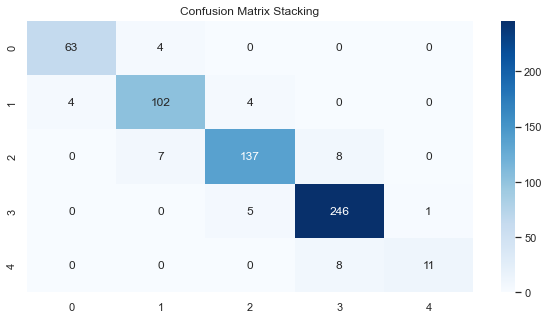

In [91]:
fig, ax = plt.subplots(figsize = (10,5))
log_con = confusion_matrix(y_test,stacking_validation)
# When label = (1,0) the value are in structure Tp,Fn,Fp,Tn
ax.set_title('Confusion Matrix Stacking')  
sb.heatmap(log_con, annot = True,cmap = 'Blues',fmt='g')

***CROSS VALIDATION OF STACKING***

In [78]:
# evaluate the model
cv =RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores7 = cross_val_score(stacking_model,X,y, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')

results.append(n_scores7)
names.append('stacking')

# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scores7), std(n_scores7)))

F1-Score: 0.948 (0.012)


In [79]:
# evaluate the model
cv =RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores7a = cross_val_score(stacking_model,X,y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

results1.append(n_scores7a)
names1.append('stacking')

# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scores7a), std(n_scores7a)))

F1-Score: 0.949 (0.012)


In [80]:
# evaluate the model
cv =RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores7r = cross_val_score(stacking_model,X,y, scoring='recall_weighted', cv=cv, n_jobs=-1, error_score='raise')

results2.append(n_scores7r)
names2.append('stacking')

# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scores7r), std(n_scores7r)))

F1-Score: 0.949 (0.012)


In [81]:
# evaluate the model
cv =RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores7p = cross_val_score(stacking_model,X,y, scoring='precision_weighted', cv=cv, n_jobs=-1, error_score='raise')

results3.append(n_scores7p)
names3.append('stacking')

# report performance
print('F1-Score: %.3f (%.3f)' % (mean(n_scores7p), std(n_scores7p)))

F1-Score: 0.950 (0.012)


# VISUALIZATIONS OF CROSS VALIDATIONS

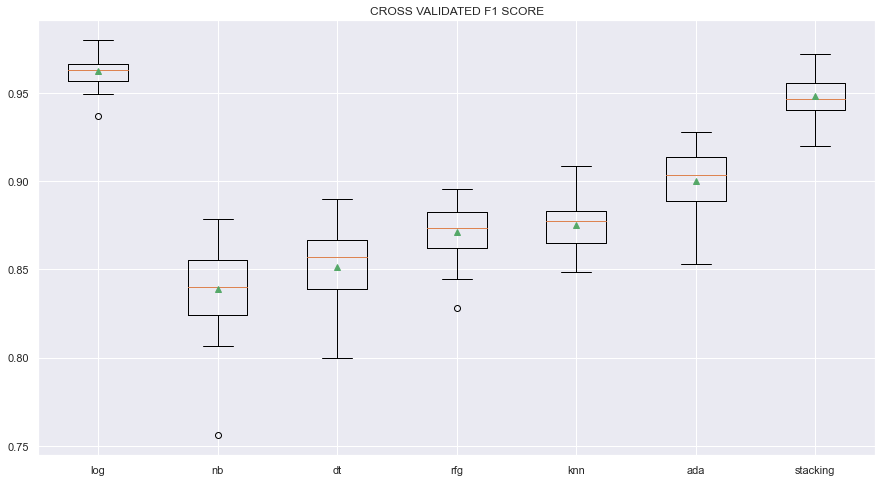

In [82]:
 #plot model performance for comparison
plt.figure(figsize=(15,8))
plt.title('CROSS VALIDATED F1 SCORE')
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

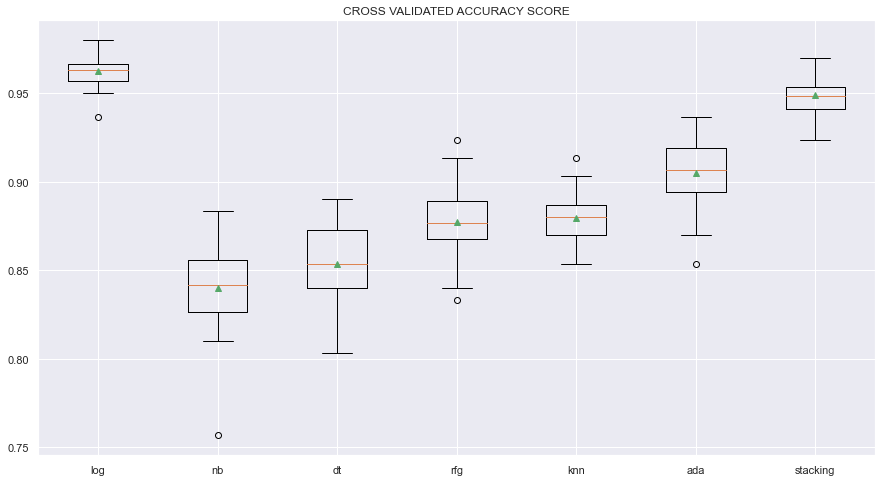

In [83]:
 #plot model performance for comparison
plt.figure(figsize=(15,8))
plt.title('CROSS VALIDATED ACCURACY SCORE')
plt.boxplot(results1, labels=names, showmeans=True)
plt.show()

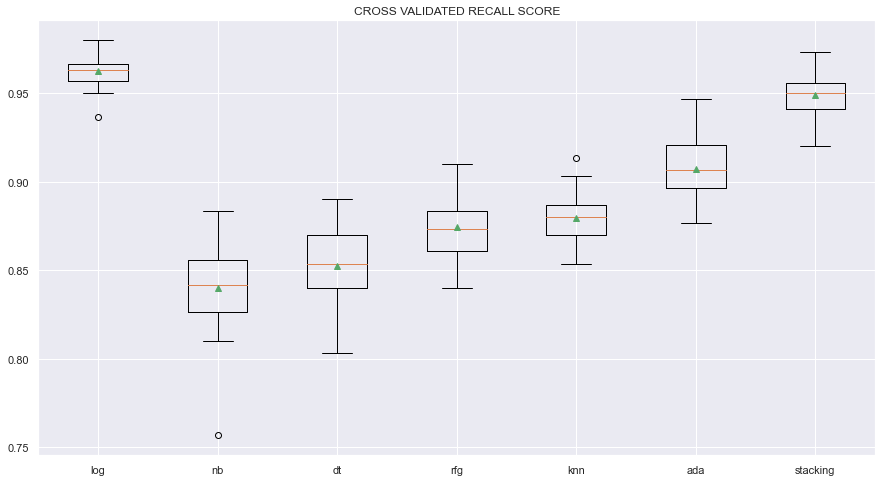

In [84]:
 #plot model performance for comparison
plt.figure(figsize=(15,8))
plt.title('CROSS VALIDATED RECALL SCORE')
plt.boxplot(results2, labels=names, showmeans=True)
plt.show()

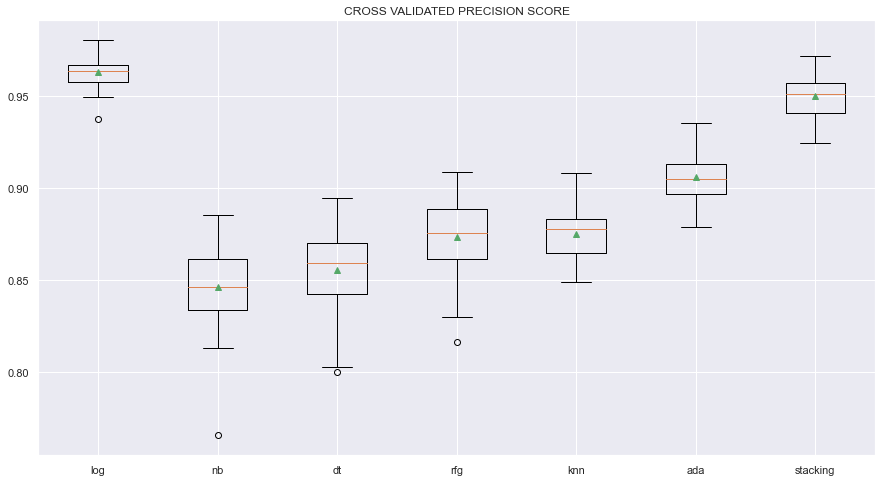

In [85]:
 #plot model performance for comparison
plt.figure(figsize=(15,8))
plt.title('CROSS VALIDATED PRECISION SCORE')
plt.boxplot(results3, labels=names, showmeans=True)
plt.show()

In [86]:
accu = [str(round((100*i),1))+' %' for i in [logistic_acc, nb_acc, dt_acc, rfg_acc, knn_acc, ada_acc, stack_acc]]
f1 = [str(round((100*i),1))+' %' for i in [log_f1, nb_f1, dt_f1, rfg_f1, knn_f1, ada_f1, stack_f1]]
re = [str(round((100*i),1))+' %' for i in [log_recall, nb_recall, dt_recall, rfg_recall, knn_recall, ada_recall, stack_recall]]
precision = [str(round((100*i),1))+' %' for i in [log_precision, nb_precision, dt_precision, rfg_precision, knn_precision, ada_precision, stack_precision]]
crF = [str(round((100*np.mean(i)),1))+' %' for i in results]
crA = [str(round((100*np.mean(i)),1))+' %' for i in results1]
crR = [str(round((100*np.mean(i)),1))+' %' for i in results2]
crP = [str(round((100*np.mean(i)),1))+' %' for i in results3]

In [87]:
eva = pd.DataFrame([accu,f1,re,precision,crF, crA, crR, crP], columns=['Logistic', 
                                                    'Naive Bayes', 
                                                    'Decision Tree', 
                                                    'Random Forest', 
                                                    'KNN', 
                                                    'ADA Boost', 
                                                    'Stacking'], index=['Accuracy', 
                                                                        'F1 Score', 
                                                                        'Recall', 
                                                                        'Precision', 
                                                                        'Cross_validated_F1', 
                                                                        'Cross_validated_Accuracy', 
                                                                        'Cross_validated_Recall', 
                                                                        'Cross_validated_Precision'])
eva

,Logistic,Naive Bayes,Decision Tree,Random Forest,KNN,ADA Boost,Stacking
Accuracy,95.3 %,95.3 %,85.7 %,87.0 %,86.7 %,89.3 %,93.2 %
F1 Score,95.3 %,80.8 %,85.4 %,86.1 %,85.7 %,88.8 %,93.0 %
Recall,95.3 %,81.0 %,85.7 %,87.0 %,86.7 %,89.3 %,93.2 %
Precision,95.4 %,81.4 %,85.3 %,86.7 %,87.1 %,89.6 %,93.2 %
Cross_validated_F1,96.2 %,83.9 %,85.1 %,87.1 %,87.5 %,90.0 %,94.8 %
Cross_validated_Accuracy,96.3 %,84.0 %,85.3 %,87.7 %,88.0 %,90.5 %,94.9 %
Cross_validated_Recall,96.3 %,84.0 %,85.2 %,87.4 %,88.0 %,90.7 %,94.9 %
Cross_validated_Precision,96.3 %,84.6 %,85.6 %,87.3 %,87.5 %,90.6 %,95.0 %


FROM THE VISUALIZATION IT CAN BE CLEARLY SEEN ***LOGISTIC REGRESSION*** GIVES THE BETTER RESULTS THAN THE OTHER ALGORITHMS WITH **ACCURACY = 96.3 %** **[F1 = 96.2%, RECALL = 96.3%, PRECISION = 96.3%]**. AND IN TERMS OF ACCURACY AND EVALUATION METRICS ***STACKING CLASSIFIER*** SEEMS TO HAVE SECOND HIGHEST **ACCURACY = 95.0 %** AND EVALUATION METRICS **[F1 = 94.8%, RECALL = 94.9%, PRECISION = 94.9%]** ON COMPARISON WITH OTHER ALGORITHMS.

***STACKING*** GIVES A GOOD RESULT NEXT TO LOGISTIC REGRESSION HOWEVER THE ACCURACY AND OTHER EVALUATION METRICS FOR BOTH CLASSIFIERS IS QUIET SAME ON COMARISON WHICH COMES ROUGHLY AROUND ***95 to 96 %***